# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [20]:
#  1-3: For each city type, get the total rides, drivers, fares.
rides_by_metro_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
drivers_by_metro_type = city_data_df.groupby(["type"]).sum()["driver_count"]
fares_by_metro_type = pyber_data_df.groupby(["type"]).sum()["fare"]

In [4]:
#  4-5: For each city type, calculate average fare per ride and fare per driver. 
avg_fare_by_metro_type = fares_by_metro_type / rides_by_metro_type
avg_fare_by_metro_type_per_driver = fares_by_metro_type / drivers_by_metro_type

In [5]:
#  6. Create a PyBer summary DataFrame. 
Pyber_metro_type_summary_df = pd.DataFrame(
          {"Total Rides": rides_by_metro_type, 
          "Total Drivers": drivers_by_metro_type, 
          "Average Fare Per Ride": avg_fare_by_metro_type,
          "Average Fare Per Driver": avg_fare_by_metro_type_per_driver})
Pyber_metro_type_summary_df

,Total Rides,Total Drivers,Average Fare Per Ride,Average Fare Per Driver
type,,,,
Rural,125,78,34.623440,55.486282
Suburban,625,490,30.970128,39.502714
Urban,1625,2405,24.525772,16.571468


In [6]:
#  7. Cleaning up the DataFrame. Delete the index name.  
Pyber_metro_type_summary_df.index.name = None

In [7]:
#  8. Format the columns.
Pyber_metro_type_summary_df["Total Rides"] = Pyber_metro_type_summary_df["Total Rides"].map("{:,}".format)
Pyber_metro_type_summary_df["Total Drivers"] = Pyber_metro_type_summary_df["Total Drivers"].map("{:,}".format)
Pyber_metro_type_summary_df["Average Fare Per Ride"] = Pyber_metro_type_summary_df["Average Fare Per Ride"].map("${:.2f}".format)
Pyber_metro_type_summary_df["Average Fare Per Driver"] = Pyber_metro_type_summary_df["Average Fare Per Driver"].map("${:.2f}".format)
Pyber_metro_type_summary_df

,Total Rides,Total Drivers,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,$34.62,$55.49
Suburban,625,490,$30.97,$39.50
Urban,"1,625","2,405",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [8]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [9]:
# 2-3. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
ride_by_date_and_type = pyber_data_df.groupby(['date', 'type']).agg({'fare': ['sum']}).reset_index()

In [17]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.
rides_by_type_on_date = ride_by_date_and_type.pivot(index='date', columns='type')['fare']
rides_by_type_on_date

sum                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [11]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
rides_by_type_jan_to_Apr = rides_by_type_on_date.loc['2019-01-01':'2019-04-29']
rides_by_type_jan_to_Apr

sum                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [12]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
rides_by_type_jan_to_Apr.index = pd.to_datetime(rides_by_type_jan_to_Apr.index)

In [13]:
# 7. Check that the datatype for the index is datetime using info method.
rides_by_type_jan_to_Apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (sum, Rural)     114 non-null    float64
 1   (sum, Suburban)  573 non-null    float64
 2   (sum, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [14]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
resample_weeks_jan_to_apr = rides_by_type_jan_to_Apr.resample("W").sum()
resample_weeks_jan_to_apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (sum, Rural)     17 non-null     float64
 1   (sum, Suburban)  17 non-null     float64
 2   (sum, Urban)     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


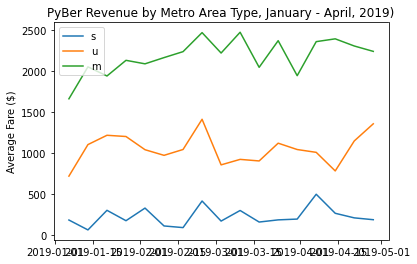

In [15]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
x_axis = resample_weeks_jan_to_apr.index
y_axis = resample_weeks_jan_to_apr["sum"]
fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)

plt.title("PyBer Revenue by Metro Area Type, January - April, 2019)")
plt.ylabel("Average Fare ($)")
plt.legend("sum")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the figure.
plt.savefig("analysis/Fig1.png")